In [1]:
#Importamos las librerias necesarias
import pandas as pd
import spacy 
import re
import matplotlib.pyplot as plt

from collections import Counter

#Definimos el modelo de SpaCy
nlp = spacy.load("en_core_web_md")

In [2]:
#Definimos las funciones reutilizables.

def normalize_text(file, new_file):
    #Esta función normaliza el texto y lo guarda en un archivo .txt
    #Abrimos el archivo .txt.
    with open(file, "r") as txt_file:
        lines = txt_file.readlines()
        
    #Convertimos el archivo en texto plano.
    text = " ".join(lines)
    
    #Limpiamos el texto de caracteres \n y números con regex.
    clean_text =re.sub(r"\n|\d+", " ", text)
    
    #Pasamos por el modelo nuestro texto
    doc = nlp(clean_text)
    
    #Eliminamos stopwords, puntuación y espacios.
    text_filtered = [token for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    #Lematizamos el texto a la vez que lo pasamos a minusculas
    text_lemmas = [token.lemma_.lower() for token in text_filtered]
    
    #guardamos el texto procesado en un archivo .txt (en caso de querer guardarlo por tokens, cambia " " por "\n")
    with open(new_file, "w", encoding="UTF-8") as file:
        file.write(" ".join(text_lemmas))
    return text_lemmas

In [3]:
###Preprocesamiento del texto###
lemmas = normalize_text("white_noise.txt", "whitenoise_lemmas.txt")

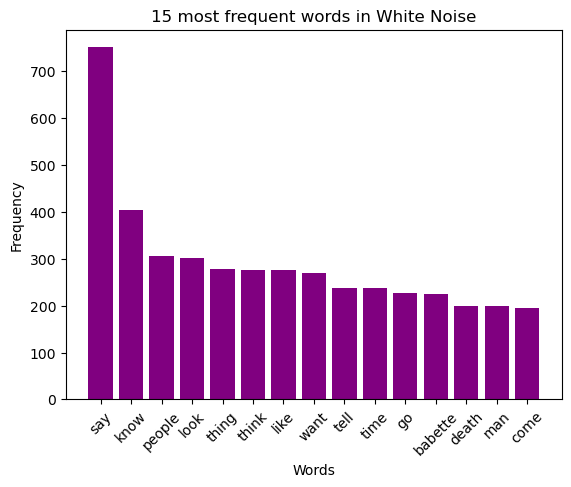

In [4]:
###Analisis del texto###
#Comprobamos la frecuencia de las palabras con Spacy
word_frequency = Counter(lemmas)

#Convertimos los datos en un DataFrame que tendrá dos columnas, Words y Frequency.
df_frequency = pd.DataFrame(word_frequency.items(), columns =["Words", "Frequency"])
#Ordenamos las palabras por frecuencia de mayor a menor.
df_frequency = df_frequency.sort_values(by="Frequency", ascending = False)

#Visualizamos las 15 palabras más comunes en un gráfico de barras usando matplotlib
df_15_words = df_frequency.head(15)#Con esta linea visualizamos las 15 primeras palabras

#Con este código visualizamos en un gráfico de barras las palabras.
plt.bar(df_15_words["Words"], df_15_words["Frequency"], color = "purple")
plt.title("15 most frequent words in White Noise")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [5]:
#Identificamos dos entidades nombradas (PERSON, LOC)
lemmas_text = " ".join(lemmas) #Convertimos lemmas en un texto continuo.
doc = nlp(lemmas_text) #procesamos el texto con el modelo elegido.
entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ["PERSON", "LOC"]]
print(entities)

[('don delillo', 'PERSON'), ('buck lois wallace', 'PERSON'), ('north america', 'LOC'), ('nixon', 'PERSON'), ('ford', 'PERSON'), ('carter', 'PERSON'), ('jack babette', 'PERSON'), ('denise steffie', 'PERSON'), ('babette denise', 'PERSON'), ('denise', 'PERSON'), ('denise hard', 'PERSON'), ('murray jay siskind', 'PERSON'), ('amish beard', 'PERSON'), ('murray', 'PERSON'), ('gladney hitler', 'PERSON'), ('murray', 'PERSON'), ('murray', 'PERSON'), ('jack', 'PERSON'), ('tweedy', 'PERSON'), ('bush', 'PERSON'), ('jack gladney', 'PERSON'), ('j. a. k. gladney', 'PERSON'), ('j. a. k.', 'PERSON'), ('horoscopes', 'PERSON'), ('jean', 'PERSON'), ('jack avant garde', 'PERSON'), ('murray', 'PERSON'), ('frank j. smalley', 'PERSON'), ('devi', 'PERSON'), ('hill', 'PERSON'), ('wan', 'PERSON'), ('denise homework', 'PERSON'), ('jack', 'PERSON'), ('treadwell', 'PERSON'), ('treadwell', 'PERSON'), ('jack', 'PERSON'), ('terry cloth', 'PERSON'), ('sun', 'PERSON'), ('north america', 'LOC'), ('bavarian hill', 'LOC'), 

In [6]:
##Cambiamos el indice del archivo Pandas para que las entidades tengan indices personalizados.
#Creamos un DataFrame con las entidades y sus etiquetas.
df_entities = pd.DataFrame(entities, columns = ["Entity", "Label"])

#Creamos una lista vacía donde irán nuestros indices.
index = []

#Creamos nuestros contadores de indices.
person_count = 0
loc_count = 0

#Creamos un bucle que asigne los indices a sus entidades
for label in df_entities["Label"]:
    #Con esta linea principal nos aseguramos que cambiamos la parte de df_entities que hace referencia a label.
    if label == "PERSON":
        person_count += 1
        index.append(f"Person{person_count}")
    elif label == "LOC":
        loc_count += 1
        index.append(f"Loc{loc_count}")

#En esta linea asignamos al dataFrame los indices nuevos
df_entities.index = index

#En caso de que queramos eliminar la columna Label una vez tenemos los indices customizados, podemos utilizar el siguiente código
#df_entities = df_entities.drop(columns = ["Label"])


In [7]:
#Guardamos las entidades en un .csv

df_entities.to_csv("entities.csv", encoding="UTF-8", index=True)

In [8]:
###Visualización de datos###
#Creamos un diccionario para almacenar la cantidad de entidades que hay.
entity_count = {"PERSON" : 0, "LOC" : 0}
#creamos una lista con las etiquetas que existen en la lisla de entidades.
entity_labels = ["PERSON", "LOC"]
#Recorremos las entidades para contar su frecuencia
for entity in entities:
    if entity[1] in entity_labels:
        entity_count[entity[1]] += 1

##Los datos que hemos extraido los pasamos a un DataFrame. 
#Pasamos el diccionario a lista para que pueda procesarse como DataFrame
entity_count = list(entity_count.items())

#Creamos el DataFrame
df_entities_total = pd.DataFrame(entity_count, columns = ["Type", "Count"])


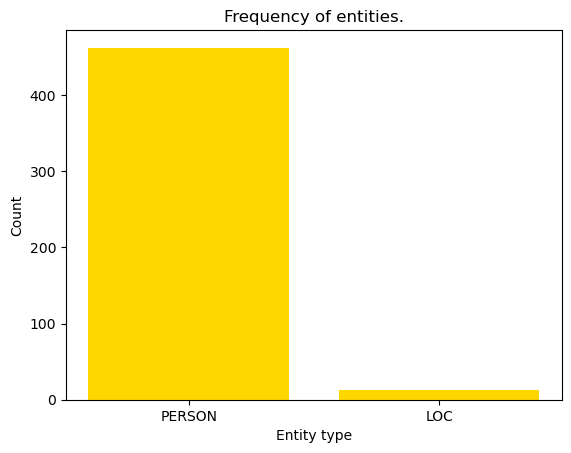

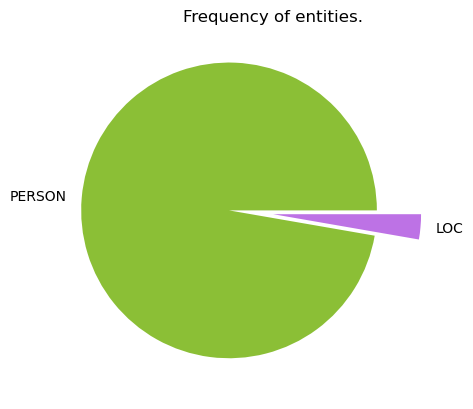

In [9]:
#Visualizamos el DataFrame con un gráfico de barras
plt.bar (df_entities_total["Type"], df_entities_total["Count"], color= "gold")
plt.title("Frequency of entities.")
plt.xlabel("Entity type")
plt.ylabel("Count")
plt.show()

#Visualizamos el DataFrame con una pie chart.
myexplode = [0.3, 0]
mycolors = ["#8BBF36","#BD72E5"]
plt.pie (df_entities_total["Count"],labels = df_entities_total["Type"], explode = myexplode, colors = mycolors)
plt.title("Frequency of entities.")
plt.show()


In [10]:
###Estadísticas y Análisis avanzado###
#procesamos nuestro texto normalizado con el modelo definido al principio.
doc = nlp(" ".join(lemmas)) #Convertimos nuestro texto a texto plano

#Vemos las POS que tiene nuestro texto.
lemmas_POS = [token.pos_ for token in doc] #Añadimos las etiquetas a una lista.

#Contamos con qué frecuencia se da cada etiqueta.
POS_count = Counter(lemmas_POS)

#Creamos un DataFrame para procesar las estadisticas.
df_POS = pd.DataFrame(POS_count.items(), columns = ["POS", "Count"])
df_POS_ordered = df_POS.sort_values(by="Count", ascending=False)


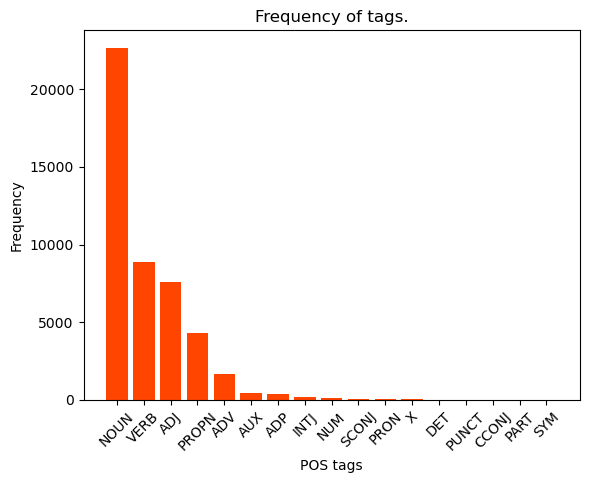

In [12]:
#Creamos un gráfico para mostrar las estadísticas
plt.bar(df_POS_ordered["POS"], df_POS_ordered["Count"], color = "orangered")
plt.title("Frequency of tags.")
plt.xlabel("POS tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()